In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from LPQ import *
import os
import random

%matplotlib inline

In [9]:
classes = ['IBM Plex Sans Arabic', 'Lemonada', 'Marhey', 'Scheherazade New']
folders = [r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\IBM Plex Sans Arabic", r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Lemonada", r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Marhey",r"D:\Downloads\College\Neural Networks\Project\archive\fonts-dataset\Scheherazade New"]

# Preprocessing Step

In [10]:
def preprocess_image(image_path, desired_size=(256, 256)):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply median filter to remove salt and pepper noise
    denoised_img = cv2.medianBlur(img, 3)

    # Threshold the image using Otsu's method
    _, thresh_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Check the color of the background at all four corners
    corners = [thresh_img[0, 0], thresh_img[0, -1], thresh_img[-1, 0], thresh_img[-1, -1]]
    white_corners = np.sum(np.array(corners) == 255)

    # If the majority of the corners are white, invert the image to make the background black
    if white_corners > 2:
        thresh_img = cv2.bitwise_not(thresh_img)

    # Resize the image to the desired size
    resized_img = cv2.resize(thresh_img, desired_size, interpolation=cv2.INTER_AREA)

    return resized_img

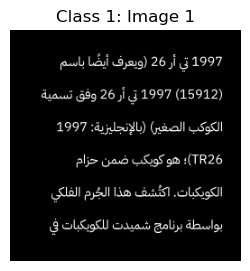

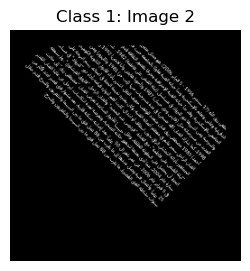

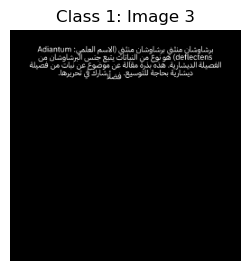

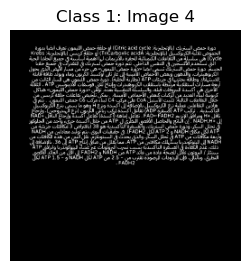

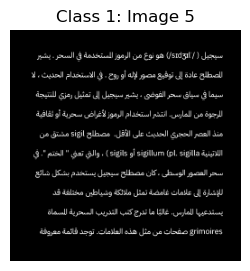

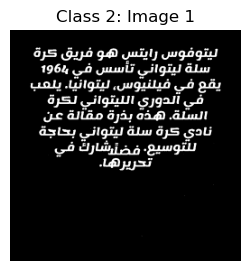

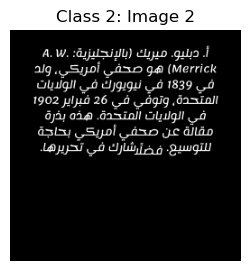

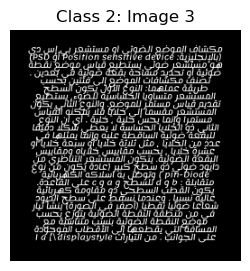

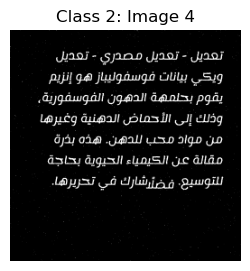

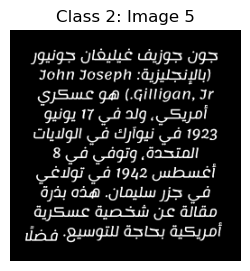

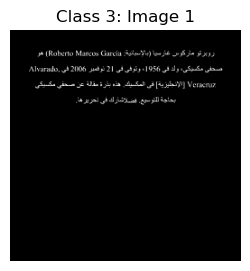

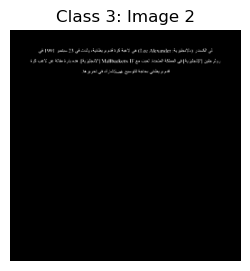

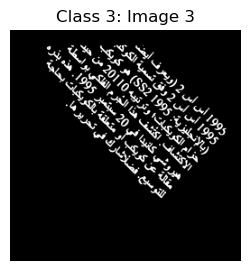

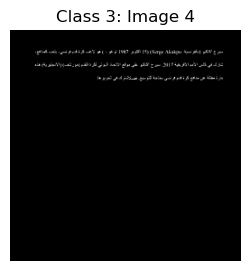

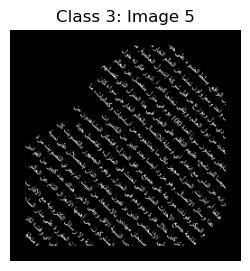

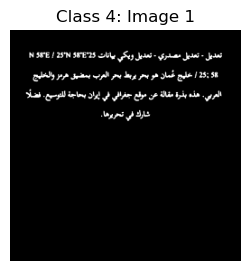

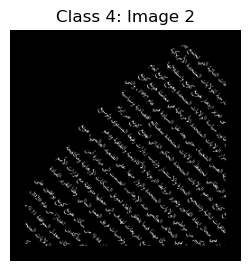

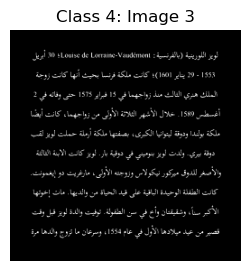

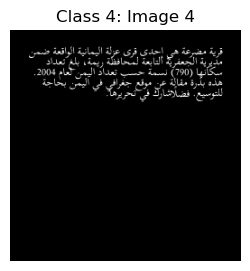

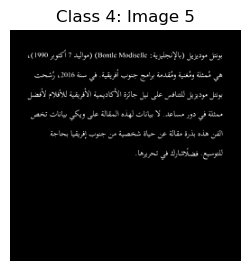

In [11]:
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_otsu

for label, folder in enumerate(folders, start=1):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    # Select 5 random files
    selected_files = random.sample(files, 5)
    for i, filename in enumerate(selected_files):
        # Preprocess image
        processed_img = preprocess_image(os.path.join(folder, filename))
        # Display the processed image
        plt.figure(figsize=(3, 3))
        plt.imshow(processed_img, cmap='gray')
        plt.title(f'Class {label}: Image {i+1}')
        plt.axis('off')
        plt.show()

In [12]:
# Initialize lists to store features and labels
LPQ_Features = []
# LPQ_Features = np.load('LPQ_Features.npy')
labels = []

# Process images for each class
for label, folder in enumerate(folders, start=1):
    files = [file for file in os.listdir(folder) if file.endswith('.jpeg')]
    for i, filename in enumerate(files):
        processed_img = preprocess_image(os.path.join(folder, filename))
        
        # Extract LPQ features
        lpq_features = lpq(processed_img)
        
        # Append features and label
        LPQ_Features.append(lpq_features)
        labels.append(label)
        print(f'Class: {classes[label-1]}, Image No: {i+1}, Label: {label}')

# Convert lists to numpy arrays
LPQ_Features = np.array(LPQ_Features)
labels = np.array(labels)

np.save('LPQ_Features.npy', LPQ_Features)


Class: IBM Plex Sans Arabic, Image No: 1, Label: 1
Class: IBM Plex Sans Arabic, Image No: 2, Label: 1
Class: IBM Plex Sans Arabic, Image No: 3, Label: 1
Class: IBM Plex Sans Arabic, Image No: 4, Label: 1
Class: IBM Plex Sans Arabic, Image No: 5, Label: 1
Class: IBM Plex Sans Arabic, Image No: 6, Label: 1
Class: IBM Plex Sans Arabic, Image No: 7, Label: 1
Class: IBM Plex Sans Arabic, Image No: 8, Label: 1
Class: IBM Plex Sans Arabic, Image No: 9, Label: 1
Class: IBM Plex Sans Arabic, Image No: 10, Label: 1
Class: IBM Plex Sans Arabic, Image No: 11, Label: 1
Class: IBM Plex Sans Arabic, Image No: 12, Label: 1
Class: IBM Plex Sans Arabic, Image No: 13, Label: 1
Class: IBM Plex Sans Arabic, Image No: 14, Label: 1
Class: IBM Plex Sans Arabic, Image No: 15, Label: 1
Class: IBM Plex Sans Arabic, Image No: 16, Label: 1
Class: IBM Plex Sans Arabic, Image No: 17, Label: 1
Class: IBM Plex Sans Arabic, Image No: 18, Label: 1
Class: IBM Plex Sans Arabic, Image No: 19, Label: 1
Class: IBM Plex Sans 

In [13]:
from sklearn.model_selection import train_test_split

# Split the shuffled data and labels into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(LPQ_Features, labels, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 256)
(3200,)
(800, 256)
(800,)


In [14]:
%load_ext autoreload
%autoreload 2
from classifiers_manager import ClassifiersManager
classifiers_manager = ClassifiersManager()
classifiers_manager.train_all_classifiers(x_train,y_train)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
classifiers_manager.load_all_classifiers()
classifiers_manager.test_all_classifiers(x_test,y_test,classes)
classifiers_manager.print_metrics()

SVM
                      precision    recall  f1-score   support

IBM Plex Sans Arabic       0.95      0.98      0.97       194
            Lemonada       1.00      0.97      0.99       198
              Marhey       0.94      0.97      0.96       211
    Scheherazade New       0.98      0.95      0.97       197

            accuracy                           0.97       800
           macro avg       0.97      0.97      0.97       800
        weighted avg       0.97      0.97      0.97       800

KNN
                      precision    recall  f1-score   support

IBM Plex Sans Arabic       0.73      0.86      0.79       194
            Lemonada       0.97      0.84      0.90       198
              Marhey       0.77      0.75      0.76       211
    Scheherazade New       0.78      0.77      0.78       197

            accuracy                           0.81       800
           macro avg       0.81      0.81      0.81       800
        weighted avg       0.81      0.81      0.81      